# 2st Notebook: Sample classification with a DNN


## 1. Reading the datasets

<p> First, we read the NumPy arrays that were generated with the previous Notebook. We count with a pickle file that contains: </p>
<ul>
    <li> <strong> x_train: </strong> A NumPy array with the samples that are going to train the DNN. </li>
    <li> <strong> y_train: </strong> A NumPy array with the labels (0's o 1's) that indicate the class ('signal' or 'background') of the samples contained in <strong>x_train</strong>. </li>
    <li> <strong> x_test: </strong> A NumPy array with the samples that are going to evaluate the DNN performance. </li>
    <li> <strong> y_test: </strong>  A NumPy array with the labels (0's o 1's) that indicate the class ('signal' or 'background') of the samples contained in <strong>x_test</strong>. This labels will allow to compute the success rate of the DNN.</li>
</ul>

The NumPy arrays are extracted from the pickle file with the command ```load()```. An example of storing/loading python variables in pickle format is available [here](https://wiki.python.org/moin/UsingPickle).

In [1]:
import pickle
import numpy as np

filename = '/home/jovyan/share/Training/DNNtraining_variables.p'

with open(filename, 'rb') as file_:
    x_train, y_train, x_test, y_test = pickle.load(file_)
    

## 2. Keras environment setup

To classify the samples with the DNN it is necessary to build the model, then compile it and finally train it. In this practical exercise we work with [keras](https://keras.io/), a module that allows to build the DNN by adding layers and setting activation functions in an easy and handy way.

First, we need to import the Keras packages that are necessary for the training, that include, among other things:
- ```callbacks``` to access the training process information e.g. loss and accuracy values after each epoch.
- Modules to include the DNN layers, activation functions or different implementations to reduce overfitting such as *dropout* or *regularizers*.
- Optimizers to define the gradient descent algorithm e.g. ```RMSprop```
- The Keras backend over which the DNN is build. In this case we will work with **Tensorflow** (although other options, such as **Theano** are possible).

In addition, we also import a module called ```history_tools.py``` which is available in this same repository. It will provide everything necessary to process the callback information when the DNN is training. On one hand, it defines a class ```LossHistory``` that serves to build an instance as the DNN training process evolves. On the other hand, it also imports a function ```plot_history()``` that will receive this instance and plot the information.

In [2]:
import keras
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import regularizers
from keras import backend as K
from keras import optimizers
import time
import os 

from history_tools import LossHistory, plot_history
import numpy as np

Using TensorFlow backend.


In [3]:
## Creating folder

def create_folder(name):
    """
    Function to create dir
    """
    try:
        os.mkdir(name)
        print("Folder <", name,"> created")
    except FileExistsError:
        print("Folder <", name, "> already exists")
    

## 3. DNN creation

Before starting the training process, we need to design the architecture of the DNN and then build it. Esentially, we have to decide:
- The number of layers of the DNN.
- The number of neurons of each layer.
- The activation functions of each layer, specially the last one.
- The optimizer.
- Other functions that could be implemented layer by layer to reduce overfitting e.g. dropout or regularizers.

Keras offers two different configurations to build neural networks architectures: The [sequential mode](https://keras.io/getting-started/sequential-model-guide/) and the [functional-api](https://keras.io/getting-started/functional-api-guide/). The later is normally used in problems way more complex that the one treated in this exercise. The DNN that we want to create can be easily build with sequential models, adding layers in a linear way (we encourage you to use this mode).

---

**TO DO: Define a sequential model and call it ```model```. Then, generate a fully connected network with the following neuron distribution in each one of the hidden layers: ```(30, 20, 20, 10, 10, 10, 5)```. Remember that we are dealing with a binary classification problem: how many neurons must contain the last layer? Remember to include the activation functions recommended in class for each layer.**

In [3]:
x_train.shape

(318666, 30)

In [4]:
model = Sequential()
# Adding layers
model.add(Dense(30, activation="relu", input_shape=(30, )))
model.add(Dense(20, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="tanh"))

model2 = model
model3 = model
model4 = model
model5 = model
model6 = model

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
__________

## 4. Compilation

When the DNN model ```model``` is already built i.e having the layer architecture, activation functions... etc correctly defined, the model has to be compiled.

In the compilation step we need to decide the **loss function**, **the optimizer**, and also the **metrics** that will be used to monitorize the training process:

---
> The **loss function** $L(\hat{y}, y)$ is a value that quantifies the discrepancy between the network predictions and the ground truth i.e. it is a definition of the error in the classification. Each time that the network ends to read a batch of samples and predicts the labels, it computes the loss value and tries to minimize it. The results of the training process depends on how this error value is defined. 
>
> You can find [here](https://keras.io/losses/) some of the functions already defined in Keras. Normally, ```categorical_crossentropy``` is used in multiclass classification problems, while ```binary_crossentropy``` is used in binary ones.
---
> The **optimizer** is an optimization algorithm that is used to minimize the loss and adjust the weights of the network gradually. Optimizers already defined in Keras can be found [here](https://keras.io/optimizers/). Some examples of them are ```SGD```, ```RMSprop``` or ```Adam```.
---
> The **metrics** is an auxiliar function that is used to define a value to evaluate the network performance while it is training. The recomended metrics for this problem is the ```accuracy``` value provided by Keras.
---
---

**TO DO: In this part of the Notebook you have to compile your neuronal network. For the first trial use ```binary_crossentropy``` as the loss function and try to minimize it using the ```SGD``` optimizer. Include in your ```metrics``` the accuracy.**

In [6]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
print('Model compiled')

Model compiled


## 5. Last considerations before training: Sample format

At this point the architecture of the network is already defined and compiled. It is now when we have to check the consistency between the format of the inputs and the network we are about to train.

Firstly, we have to check that the samples can be read by the DNN. We have to make sure that the network is expecting vectors of a dimension that matches the one of the input i.e. if the samples are 30-dimensional vectors, the DNN should be built to read exactly that.

Secondly, we have to keep in mind that the network is going to compare its predictions and the input label vectors (y_train and y_test). So they are expected to have the same format:

> If the DNN is a binary network the label need to be given in nEvents x 1 ```numpy.array``` with an unique element per sample that indicates the class:
>
>```
y = numpy.array([[1],
                 [0],
                 [1],
                 [1],
                 ...,
                 [0]])
>```

> If, on the contrary, we are dealing with $N$ classes ($N > 2$) the label vector needs a higher dimensional nEvents x $N$ ```numpy.array``` (one element per class). All the entries of each row (row = Event) will be 0 excluding the one that corresponds to the correct class. For example, the last vector ($N = 2$) will be writen as:
>```
>y = numpy.array([[0, 1],
                 [1, 0],
                 [0, 1],
                 [0, 1],
                 ...,
                 [1, 0]])
>```



## 6. Neural network training 

Now we need to define the characteristics of the training process i.e. which samples will the DNN use, how many times it will read them, in how many steps, the callbacks... etc.

In first place it is recomended to create an instance of the class ```LossHistory```, imported in previous steps. This object is basically a container of **information about the training process**. It stores the accuracy and loss values at the end of every epoch. In order to be updated in this way, it is given as a ```callbacks``` parameter to the DNN.

The **number of epochs** also needs to be defined, that is, the number of times that the DNN reads the entire train dataset ```x_train```. It is important to keep in mind that we must reach a compromise between two opposite effects:
- If the number of epochs is very small, it is possible that the network does not have enough time to extract the information and learn how to classify the samples properly. In this happens, events would be classified randomly.
- If the number of epochs is too big, **overfitting** may happen. Overfitting is the challenge of machine learning and it basically means that *the network has learnt too much*, even the tiny details in which we do not want to base our classification criteria. The DNN could be able to learn systematic effects, fluctuations... that may prevent itself to generalize the model to the test dataset.

We also have to define the **batch size** i.e. the number of samples read in each iteration inside an epoch. The network reads the set of samples in the batch, computes the loss, optimizes the weights and reads the next batch until the epoch ends. And it starts again.

---

The DNN model, defined in the python variable ```model``` is trained by means of the function ```fit``` that takes as main parameters:

1. The dataset ```x_train``` and its labels ```y_train``` of the events used to train the network.
2. The number of epochs ```epochs```.
3. The batch size ```batch_size```.
4. The instance of ```LossHistory``` that stores the accuracy and loss values at the end of each epoch, that is given as an argument of ```callbacks```.
5. The ```verbose``` level that sets how much infomation about the training do we want to print.
6. A boolean value ```shuffle``` that alters the original order of the datasets given as the input. We already shuffled the samples in the previous notebook, but it is advisable to turn this parameter ```True``` anyway. 

---

**TO DO: For now, train the DNN during 20 epochs fixing a ```batch_size``` of 512. Use as validation set a 10% portion of the training dataset and make sure that you are shuffling your samples. Include a ```callbacks``` containing the history of the training.**

In [7]:
import time
import numpy as np

print('Training model...')

history = LossHistory()

n_epochs = 20
n_batch = 512



start_time = time.time()


model.fit(x_train, y_train, batch_size=n_batch, epochs=n_epochs, callbacks=[history], shuffle=True, validation_split=0.1)

print("Training duration : {0}".format(time.time() - start_time) + " secs")


Training model...
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
286799/286799 [==============================] - 5s 19us/step - loss: 0.6011 - acc: 0.6633 - val_loss: 0.5844 - val_acc: 0.6991
Epoch 2/20
286799/286799 [==============================] - 5s 18us/step - loss: 0.5451 - acc: 0.7232 - val_loss: 0.5241 - val_acc: 0.7413
Epoch 3/20
286799/286799 [==============================] - 5s 17us/step - loss: 0.5165 - acc: 0.7473 - val_loss: 0.5165 - val_acc: 0.7597
Epoch 4/20
286799/286799 [==============================] - 4s 14us/step - loss: 0.4909 - acc: 0.7671 - val_loss: 0.5119 - val_acc: 0.7525
Epoch 5/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4727 - acc: 0.7801 - val_loss: 0.4724 - val_acc: 0.7875
Epoch 6/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4704 - acc: 0.7824 - val_loss: 0.4886 - val_acc: 0.7735
Epoch 7/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4506 - acc: 0.

## 7. Save the training information

Once trained, the network weights are fixed and the network can be used to classify other samples that have not been used to train it. Saving the trained model implies saving the architecture (layer number, neurons, dropout... etc) but also **saving the network weights**. In this way, it is possible to use this trained DNN to classify whatever we want without training it again and again.

---

**TO DO: Save your model in ```.h5``` format in the ```Models/``` folder. Check first if this directory exists and if it does not, create it.**

In [9]:
create_folder("Models")
## Saving model.h5
model.save("Models/model.h5")
print("model.h5 saved in <Models/>")

Folder < Models > created
model.h5 saved in <Models/>


## 8. Loss and accuracy study

To check if the training process succeded we have to study the evolution of loss and accuracy. We expect a decrease in the loss value, pointing out that the error in the classification is decreasing as well. On the other hand, we expect an increase in the accurary that would imply that the DNN is becoming more capable of classifying the samples in their correct class.

Both values, loss and accuracy, are plotted vs the number of epochs to see the evolution. In most cases we will observe the decrease in the loss and increase in accuracy for the **training set**.

However, the behavior of the **validation set** is more complex and will give an idea of how to opmitize the learning process. As the samples of this dataset are different from the ones used to train the network, the performance would be slightly worse.

Overfitting manifests itself in the loss and accuracy evolution. When the network starts to learn undesired patterns from the training set that can not be extrapolated to the validation set, the loss stops its decrease and starts to grow up. Consequently, accuracy gets reduced at this point.

The function ```plot_history()```, already defined in ```history_tools.py```, can be used to plot both accuracy and loss.

---

**TO DO: Check if folder ```History/``` exists and if not, create it. Then use ```plot_history()``` to study the loss and accuracy behaviors. Plots will be automatically saved in this folder.**



Folder < History > created


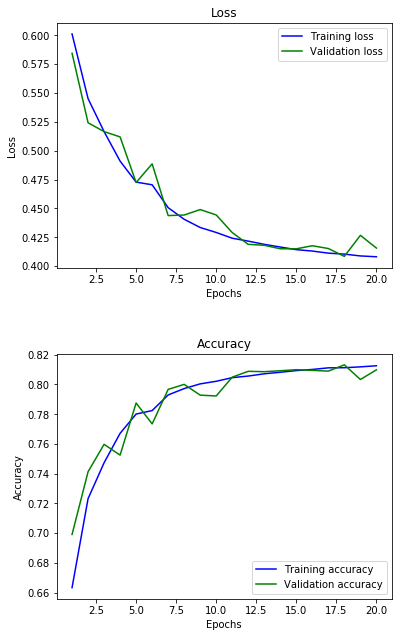

In [10]:
## Folder History
create_folder("History")
## Plots
plot_history(history, Num_classes=1, n_batch=512, n_epochs=20)

<strong>TO DO:

Now repeat the last steps with the following modifications:

- Use the RMSprop optimizer
- Use the Adam optimizer

What optimizer works better

<font color="red"> My answer: </font> <font color="blue"> Adam </font>

Using the one that have the best performance: Do you observe something weird in the plot by comparing the accuracy of the train and validation datasets?
<font color="red"> My answer: </font> <font color="blue"> Yes, the validation curve remains pretty much constant for both Loss and Accuracy plots. The _Learning curves_ obtained shows a `validation loss` that is too small in comparison to the one for the  `training loss` (it seems like the `validation dataset`is easier to predict or "to learn" than the `training dataset`)   </font>

- Try to decrease the learning rate value

What do you observe now?
<font color="red"> My answer: </font> <font color="blue"> Smooth, showing a good fit. Now, the `validation loss`is learned as well (and almost "_equally_") as the `training loss` </font>

Finally, add to your final model (with the best optimizer/learning rate choice you made) a ```callback``` with ```EarlyStopping``` and ```ModelCheckpoint``` options and train it over 200 epochs. In the ```EarlyStopping``` option use ```val_loss``` value as reference and wait 5 epochs before to stop definitely. In the ```ModelCheckpoint``` use ```val_loss``` as well and save the best model you obtained.

(It would be useful to check the callback documentation in Keras [here](https://keras.io/callbacks/))

Once you have your best model, you can pass to section 9 of the Notebook.
</strong>



-----
Optimizer: _RMSprop_
-----

In [6]:
model2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
print("model rmsprop compiled")

model rmsprop compiled


Training model ....
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
286799/286799 [==============================] - 5s 17us/step - loss: 0.5413 - acc: 0.7299 - val_loss: 0.4536 - val_acc: 0.7890
Epoch 2/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4320 - acc: 0.7993 - val_loss: 0.4345 - val_acc: 0.8010
Epoch 3/20
286799/286799 [==============================] - 4s 14us/step - loss: 0.4137 - acc: 0.8110 - val_loss: 0.4184 - val_acc: 0.8103
Epoch 4/20
286799/286799 [==============================] - 5s 16us/step - loss: 0.4061 - acc: 0.8148 - val_loss: 0.4216 - val_acc: 0.8093
Epoch 5/20
286799/286799 [==============================] - 5s 18us/step - loss: 0.4015 - acc: 0.8169 - val_loss: 0.4125 - val_acc: 0.8108
Epoch 6/20
286799/286799 [==============================] - 5s 18us/step - loss: 0.3994 - acc: 0.8187 - val_loss: 0.4052 - val_acc: 0.8190
Epoch 7/20
286799/286799 [==============================] - 6s 20us/step - loss: 0.3975 - acc: 

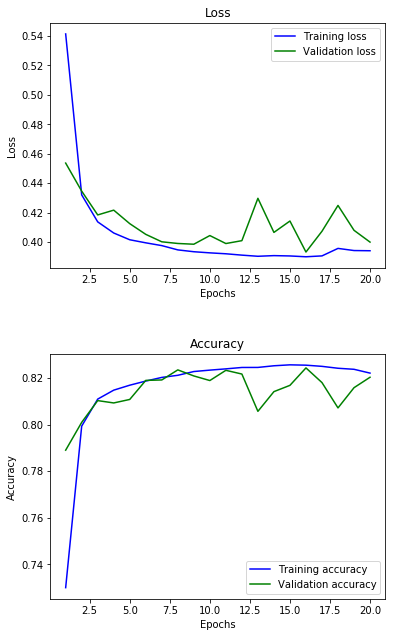

In [7]:
print("Training model ....")
history2 = LossHistory()
    
start_time = time.time()

model2.fit(x_train, y_train, batch_size=512, 
            epochs=20, callbacks=[history2], shuffle=True, validation_split=0.1)

print("Training duration : {0}".format(time.time() - start_time) + " secs")

create_folder("History")
plot_history(history=history2, Num_classes=1,n_batch=512, n_epochs=20)

-----
Optimizer: _Adam_
-----

In [5]:
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
print("model adam compiled")

model adam compiled


Training model ....
Train on 286799 samples, validate on 31867 samples
Epoch 1/20
286799/286799 [==============================] - 5s 18us/step - loss: 1.0722 - acc: 0.7058 - val_loss: 0.4432 - val_acc: 0.7950
Epoch 2/20
286799/286799 [==============================] - 6s 19us/step - loss: 0.4256 - acc: 0.8044 - val_loss: 0.4130 - val_acc: 0.8112
Epoch 3/20
286799/286799 [==============================] - 5s 16us/step - loss: 0.4101 - acc: 0.8121 - val_loss: 0.4084 - val_acc: 0.8133
Epoch 4/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4028 - acc: 0.8155 - val_loss: 0.4050 - val_acc: 0.8140
Epoch 5/20
286799/286799 [==============================] - 5s 17us/step - loss: 0.3998 - acc: 0.8174 - val_loss: 0.4005 - val_acc: 0.8177
Epoch 6/20
286799/286799 [==============================] - 4s 14us/step - loss: 0.3963 - acc: 0.8188 - val_loss: 0.3966 - val_acc: 0.8204
Epoch 7/20
286799/286799 [==============================] - 4s 13us/step - loss: 0.3938 - acc: 

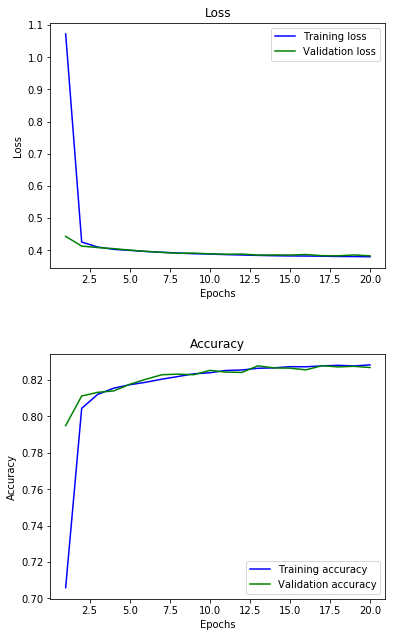

In [6]:
print("Training model ....")
history3 = LossHistory()
    
start_time = time.time()

model3.fit(x_train, y_train, batch_size=512, 
            epochs=20, callbacks=[history3], shuffle=True, validation_split=0.1)

print("Training duration : {0}".format(time.time() - start_time) + " secs")

create_folder("History")
plot_history(history=history3, Num_classes=1,n_batch=512, n_epochs=20)

> Yep, something weird is happening: Accuracy is not getting any better within epochs and despite the fact the "Loss" is kind of decreasing, the rate is smaller than the former model implemented (with `sgd`). Also, both plots are showing different values between _Training_ and _Validation_

-----
Optimizer: _Adam_ lr = 0.0001
-----

**Decreasing the learning rate value in _Adam_**

In [7]:
opt = optimizers.adam(lr=0.0001)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
print("model adam lr = 0.0001 compiled")

model adam lr = 0.0001 compiled


In [8]:
history5 = LossHistory()

n_epochs = 20
n_batch = 512



start_time = time.time()


model5.fit(x_train, y_train, batch_size=n_batch,
           epochs=n_epochs, callbacks=[history5], shuffle=True, validation_split=0.1)

print("Training duration : {0}".format(time.time() - start_time) + " secs")

Train on 286799 samples, validate on 31867 samples
Epoch 1/20
286799/286799 [==============================] - 9s 30us/step - loss: 0.8142 - acc: 0.5664 - val_loss: 0.6064 - val_acc: 0.6760
Epoch 2/20
286799/286799 [==============================] - 4s 14us/step - loss: 0.5678 - acc: 0.7073 - val_loss: 0.5456 - val_acc: 0.7247
Epoch 3/20
286799/286799 [==============================] - 4s 14us/step - loss: 0.5300 - acc: 0.7362 - val_loss: 0.5162 - val_acc: 0.7460
Epoch 4/20
286799/286799 [==============================] - 5s 17us/step - loss: 0.5028 - acc: 0.7548 - val_loss: 0.4898 - val_acc: 0.7639
Epoch 5/20
286799/286799 [==============================] - 5s 18us/step - loss: 0.4797 - acc: 0.7698 - val_loss: 0.4702 - val_acc: 0.7782
Epoch 6/20
286799/286799 [==============================] - 5s 18us/step - loss: 0.4625 - acc: 0.7816 - val_loss: 0.4552 - val_acc: 0.7894
Epoch 7/20
286799/286799 [==============================] - 4s 15us/step - loss: 0.4484 - acc: 0.7907 - val_loss: 0

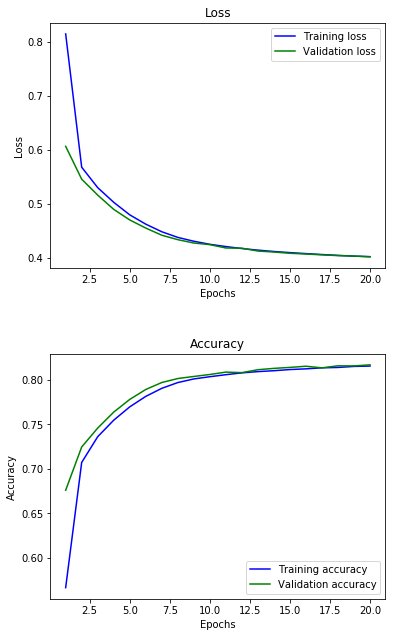

In [9]:
plot_history(history=history5, Num_classes=1,n_batch=512, n_epochs=20)

In [10]:
model5.save("Models/model5.h5")
print("model5.h5 saved in <Models/>")

model5.h5 saved in <Models/>


Finally, add to your final model (with the best optimizer/learning rate choice you made) a ```callback``` with ```EarlyStopping``` and ```ModelCheckpoint``` options and train it over 200 epochs. In the ```EarlyStopping``` option use ```val_loss``` value as reference and wait 5 epochs before to stop definitely. In the ```ModelCheckpoint``` use ```val_loss``` as well and save the best model you obtained.

(It would be useful to check the callback documentation in Keras [here](https://keras.io/callbacks/))

Once you have your best model, you can pass to section 9 of the Notebook.

In [3]:
model_early = Sequential()
# Adding layers
model_early.add(Dense(30, activation="relu", input_shape=(30, )))
model_early.add(Dense(20, activation="relu"))
model_early.add(Dense(20, activation="relu"))
model_early.add(Dense(10, activation="relu"))
model_early.add(Dense(10, activation="relu"))
model_early.add(Dense(10, activation="relu"))
model_early.add(Dense(5, activation="relu"))
model_early.add(Dense(1, activation="tanh"))

In [4]:
opt = optimizers.adam(lr=0.0001)
model_early.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
print('Model Early Stop compiled')

Model Early Stop compiled


In [5]:
filepath = "Models/model5.h5"

history_Final = LossHistory()
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
modelCheck = keras.callbacks.ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True)

n_epochs = 200
n_batch = 512

start_time = time.time()

model_early.fit(x_train, y_train, batch_size=n_batch, epochs=n_epochs, 
                callbacks=[history_Final,modelCheck,early_stop], shuffle=True, validation_split=0.1)

print("Training duration : {0}".format(time.time() - start_time) + " secs")

Train on 286799 samples, validate on 31867 samples
Epoch 1/200
286799/286799 [==============================] - 7s 25us/step - loss: 0.7484 - acc: 0.6110 - val_loss: 0.6100 - val_acc: 0.6789
Epoch 2/200
286799/286799 [==============================] - 6s 21us/step - loss: 0.5817 - acc: 0.7018 - val_loss: 0.5562 - val_acc: 0.7198
Epoch 3/200
286799/286799 [==============================] - 6s 21us/step - loss: 0.5444 - acc: 0.7294 - val_loss: 0.5295 - val_acc: 0.7386
Epoch 4/200
286799/286799 [==============================] - 5s 19us/step - loss: 0.5203 - acc: 0.7449 - val_loss: 0.5070 - val_acc: 0.7560
Epoch 5/200
286799/286799 [==============================] - 5s 16us/step - loss: 0.4979 - acc: 0.7596 - val_loss: 0.4858 - val_acc: 0.7708
Epoch 6/200
286799/286799 [==============================] - 5s 18us/step - loss: 0.4785 - acc: 0.7713 - val_loss: 0.4680 - val_acc: 0.7794
Epoch 7/200
286799/286799 [==============================] - 6s 21us/step - loss: 0.4637 - acc: 0.7803 - val_

In [6]:
model_early.save("Models/model_early.h5")
print("model_early.h5 saved in <Models/>")

model_early.h5 saved in <Models/>


## 9. Evaluate the DNN performance

Once you have your best model defined, it is time to evaluate its performance with the samples of the **test dataset** (be aware that this must be the **first time** over this notebook that you use your test dataset). This dataset contains samples that the DNN has not seen before, so the comparison between network predictions and ground truth gives reliable results of the network's discrimination power.

The first thing to do is to use the DNN to classify the samples contained in ```x_test``` and obtain the corresponding accuracy and loss values. To this purpose, you have to use the function ```evaluate()``` over the ```model``` object (your best model) once trained. This function takes as parameters the ```x_test``` samples, the ```y_test``` labels and the ```batch_size```.

```batch_size``` must be set to 1 in order to classify the samples one by one.

---

**TO DO: Evaluate your best model by using the test dataset. Call the results of the evaluation ```score```.**


In [5]:
from keras.models import load_model

In [6]:
#model5 = load_model('Models/model5.h5')
model_early = load_model('Models/model_early.h5')

In [7]:
score = model_early.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 26s 3ms/step


In [8]:
score

[0.40416921204806033, 0.8178]

In [6]:
#score = model5.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 28s 3ms/step


In [7]:
#score (w. model5)

[0.40321297290693103, 0.819]

<strong>TO DO: Save the predictions given by the network for each one of the samples of the ```x_test``` dataset in a python variable called ```y_pred```. Print this variable to understand the format in which the network predictions are given.

Note: This is the discriminant given by the network.</strong>

In [9]:
y_pred = model_early.predict(x_test)

In [10]:
y_pred

array([[0.9721322 ],
       [0.94567525],
       [0.1446568 ],
       ...,
       [0.90304255],
       [0.49646014],
       [0.8470634 ]], dtype=float32)

In [12]:
y_test

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

### 9.1 Discriminant distribution

The discriminant distribution takes a very charactistic shape depending on how much efficient is he DNN classifying  the samples of the test dataset.

Those values are plotted for both signal and background events and in this way we can observe how the network predicts the events of each class separately (discriminant values for signal are expected to be close to 1, while background events should be close to 0).

We use ```matplotlib.pyplot``` to plot the distributions:

[0.1446568  0.2028589  0.06578999 ... 0.02591492 0.7946536  0.49646014]
[0.9721322  0.94567525 0.6340972  ... 0.7363924  0.90304255 0.8470634 ]


<Figure size 432x288 with 0 Axes>

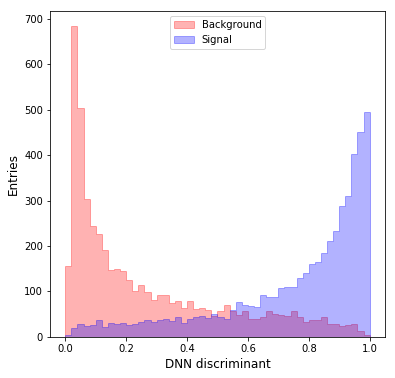

In [11]:
import os
from matplotlib import pyplot as plt

# Convert the y_pred and y_test numpy matrixes to 1-dimensional numpy arrays:
discriminant = np.squeeze(np.asarray(y_pred))
true_labels = np.squeeze(np.asarray(y_test))

# Get the discriminant values for each class (0: background, 1: signal):
discriminant0 = discriminant[list(true_labels == 0)]
print(discriminant0)
discriminant1 = discriminant[list(true_labels == 1)]
print(discriminant1)

# Define the binning:
binning = np.linspace(0, 1, 51)


# Plot the discriminant distributions:
plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
pdf0, bins0, patches0 = plt.hist(discriminant0, bins = binning, color = 'r', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='r', label = 'Background')
pdf1, bins1, patches1 = plt.hist(discriminant1, bins = binning, color = 'b', alpha = 0.3, histtype = 'stepfilled', linewidth = 1, edgecolor='b', label = 'Signal')
plt.legend(loc = 'upper center')
plt.ylabel('Entries', fontsize = 12)
plt.xlabel('DNN discriminant', fontsize = 12)
if not os.path.exists('Results/'): os.makedirs('Results/')
plt.savefig('Results/Discriminant_distribution.png', dpi = 600)

### 9.2 ROC curve

In a classification problem the main goal is to maximize the number of true classified samples but also to minimize the number of errors. That is, to obtain the higher number of true signal events classified as signal events while avoiding to classify background events as signal events.

In this context we have the following definitions:
- <font color="green"> True Positives TP: True signal events classified as signal events.</font>
- <font color="red"> Fake Positives FP: True background events classified as signal events.</font>
- <font color="red"> Fake Negatives FN: True signal events classified as background events.</font>
- <font color="green"> True Negatives TN: True background events classified as background events.</font>

>The DNN **sensitivity** is defined as the **True Positive Rate (TPR)** i.e. the ratio of True Positives obtained and the total number of true signal samples (true class == 1) in the test set:
>$$\text{TPR} = \dfrac{\text{TP}}{\text{TP} + \text{FN}}$$

> The DNN **False Positive Rate (FPR)** is defined as the ratio between the False Positives obtained and the total number of true background samples (true class == 0) in the test set:
>$$\text{FPR} = \dfrac{\text{FP}}{\text{FP} + \text{TN}}$$

Both TPR and FPR vary as we set the discriminant value over which we interpret that an event is considered as a  signal event. That is, we could say that every event with discriminant > 0.6 is classified as signal or chose another cut value (0.4, 0.5... etc). All this choices have their correspondent TPR and FPR. Our objective is to identify the discriminant cut that gives the highest TPR and lowest FPR relation.

The **ROC curve** is defined to study this choice and also evaluate the classification power of our network. It shows the TPR vs FPR relation as the cut in the discriminant varies (from 0 to 1). In Figure 9.1 we show an example of this TPR vs FPR space.

---

<img src="https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png" width="40%">

> **Figure 9.1**: ROC curve example.

---

The **Area Under the Curve (AUC)** is used to quantify the network performance. The higher it is, the more efficient the network is classifying samples. Normally we have the following criteria to evaluate the AUC value:

```.90-1 = excellent (A)```
```.80-.90 = good (B)```
```.70-.80 = fair (C)```
```.60-.70 = poor (D)```
```.50-.60 = fail (F)```

In order to implement the **ROC curve** creation in the code we use we use the python package ```sklearn``` (see [here](https://scikit-learn.org/stable/)). Inside the module ```sklearn.metrics``` there is a function ```roc_curve()``` that takes the network predictions ```y_pred``` and the ground truth ```y_test``` for the samples of the **test dataset**. The function computes the **TPR** (```tpr```) and the **FPR** (```fpr```) by scanning the possible values of the discriminant cut (```thresholds```) and returns that information contained in ```numpy.array``` objects. An example of the code implementation would be something like:

```fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)```

**AUC** can be easily computed from ```fpr``` and ```tpr``` by using another function provided by ```sklearn```:

```auc = metrics.auc(fpr, tpr)```

**TO DO: The full implementation is already done and you can check the results of your DNN by just running:** 

The optimal cut value is: 0.54946375


<Figure size 432x288 with 0 Axes>

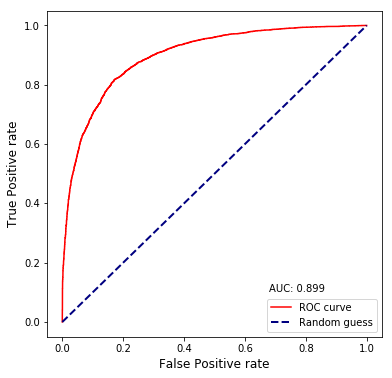

In [13]:
import os
from matplotlib import pyplot as plt
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)

plt.clf()
plt.figure(num=None, figsize=(6, 6))
plt.subplot(111)
plt.plot(fpr, tpr, color = 'r', label = "ROC curve")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "Random guess")
plt.legend(loc = "lower right")
plt.xlabel('False Positive rate', fontsize = 12)
plt.ylabel('True Positive rate', fontsize = 12)
plt.text(0.68, 0.1, 'AUC: %.3f' % auc)
plt.savefig('Results/ROC.png', dpi =  600)


#### Optative and not explained (Youden index, cut value):
Youden_index = tpr - fpr
i_max = np.argmax(Youden_index)
cut_value = thresholds[i_max]

print("The optimal cut value is: " + str(cut_value))

### 9.3 Confusion matrix

Finally and with the optimal cut value in the discriminant already chosen, the results of the DNN performance can be presented in the form of a **confusion matrix**.

>Being $N$ the number of classes, the **confusion matrix** is a $N$x$N$ matrix where the rows are the true classes of the samples and the columns the class predictions given by the network. In this case the confusion matrix is a 2x2 matrix with two classes (0: background, 1: signal). The entries of the matrix are the fraction of samples of the test dataset filled in each category.

In this sense, the confusion matrix can be understood as a 2-dimensional normalized histogram.

According to this definition, the **True Positives (TP)** are stored in (1,1), **True Negatives (TN)** in (0,0), **False Positives (FP)** in (0,1) and **False Negatives (FN)** in (1,0).

**TO DO: The confusion matrix is already implemented and you can obtain the one from your model by running:** 

-> Computing confusion matrix...
Normalized confusion matrix
[[0.829  0.171 ]
 [0.1832 0.8168]]


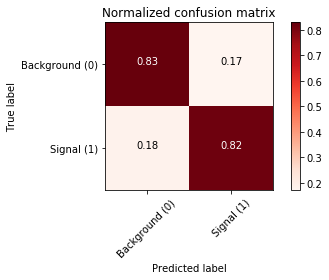

In [14]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from results_tools import plot_confusion_matrix

print("-> Computing confusion matrix...")

y_test_confusion = true_labels
y_pred_confusion = np.zeros(len(discriminant))

for i in range(0, len(discriminant)):
    if discriminant[i] > cut_value: # threshold
        y_pred_confusion[i] = 1
    else:
        y_pred_confusion[i] = 0
        

cnf_matrix = confusion_matrix(y_test_confusion, y_pred_confusion)


plt.figure()
plot_confusion_matrix(cm=cnf_matrix, classes=['Background (0)', 'Signal (1)'], normalize=True, title='Normalized confusion matrix')

if not os.path.exists('Results/'): os.makedirs('Results/')
plt.savefig("Results/ConfusionMatrix.png", dpi = 600)